In [102]:
#Basic Computation
import numpy as np
from numpy import arange
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.stattools import adfuller

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Feature Selection Metrics
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.feature_selection import mutual_info_regression
from ace_cream import ace_cream
from minepy import MINE
import pingouin as pg
from rdc import rdc
import mrmr

#Preprocessing and performance evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import log,pi,hypot,fabs,sqrt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# grid search hyperparameters for ridge regression
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
power = pd.read_csv(".\dataset\household_power_consumption.txt\household_power_consumption.txt",header = 0,sep = ";",parse_dates = [0])

In [3]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [54]:
print(power.isnull().any(),power.isnull().T.any())

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool 0          False
1          False
2          False
3          False
4          False
           ...  
2075254    False
2075255    False
2075256    False
2075257    False
2075258    False
Length: 2075259, dtype: bool


In [4]:
power.dropna(inplace=True)

In [5]:
power.iloc[:,2:-1] = power.iloc[:,2:-1].apply(pd.to_numeric)

In [57]:
power.shape

(2049280, 9)

In [61]:
power

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [50]:
# Without Time
power_1 = power.copy().drop(['Time'],axis=1)

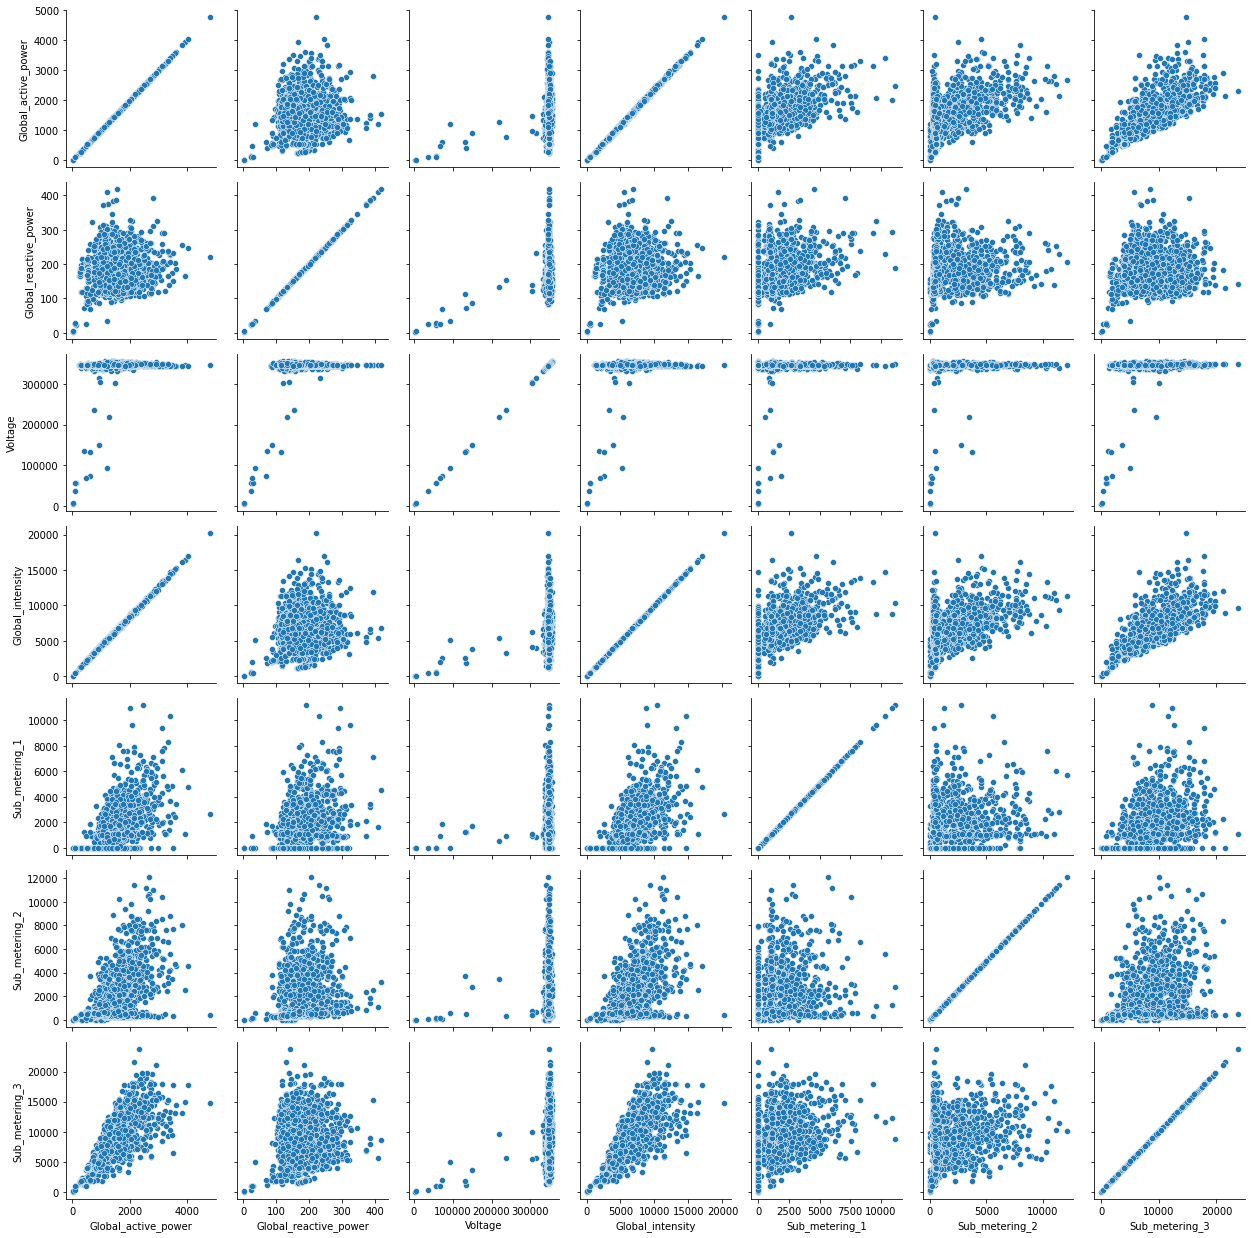

In [104]:
g = sns.PairGrid(sum_df)
g.map(sns.scatterplot)

In [142]:
# Using summed data prediction
sum_df = power_1.groupby('Date').agg(np.sum)
sum_df.columns = list(power.columns[2:])

# Make the target column the last column
test = sum_df.copy()
temp = test['Global_intensity']
test.drop('Global_intensity',axis=1,inplace=True)

sum_df.drop('Global_intensity',axis=1,inplace=True)
sum_df.insert(sum_df.shape[1],temp.name,temp)
# test.insert(test.shape[1],temp.name,temp)

In [143]:
test.head(5)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,
2006-12-16,1209.176,34.922,93552.53,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,0.0,2648.0,14063.0


In [144]:
sum_df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,0.0,546.0,4926.0,5180.8
2006-12-17,3390.460,226.006,345725.32,2033.0,4187.0,13341.0,14398.6
2006-12-18,2203.826,161.792,347373.64,1063.0,2621.0,14018.0,9247.2
2006-12-19,1666.194,150.942,348479.01,839.0,7602.0,6197.0,7094.0
2006-12-20,2225.748,160.998,348923.61,0.0,2648.0,14063.0,9313.0


### Lagging all features

In [109]:
for col in test.columns:
    for i in range(1,31):
        test[col+'_lag_'+str(i)] = test[col].shift(i)

In [110]:
test.insert(test.shape[1],temp.name,temp)

In [112]:
test[test.columns[-1]+'_(t+1)'] = test.iloc[:,-1].shift(-1)

In [115]:
test

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_lag_1,Global_active_power_lag_2,Global_active_power_lag_3,Global_active_power_lag_4,...,Sub_metering_3_lag_23,Sub_metering_3_lag_24,Sub_metering_3_lag_25,Sub_metering_3_lag_26,Sub_metering_3_lag_27,Sub_metering_3_lag_28,Sub_metering_3_lag_29,Sub_metering_3_lag_30,Global_intensity,Global_intensity_(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,0.0,546.0,4926.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5180.8,14398.6
2006-12-17,3390.460,226.006,345725.32,2033.0,4187.0,13341.0,1209.176,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14398.6,9247.2
2006-12-18,2203.826,161.792,347373.64,1063.0,2621.0,14018.0,3390.460,1209.176,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9247.2,7094.0
2006-12-19,1666.194,150.942,348479.01,839.0,7602.0,6197.0,2203.826,3390.460,1209.176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7094.0,9313.0
2006-12-20,2225.748,160.998,348923.61,0.0,2648.0,14063.0,1666.194,2203.826,3390.460,1209.176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9313.0,7238.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,1724.0,646.0,6444.0,1973.108,2035.418,1439.426,1645.424,...,8996.0,4118.0,7781.0,11728.0,11418.0,8850.0,15706.0,9916.0,4892.0,2338.2
2010-12-08,529.698,169.098,346744.70,0.0,514.0,3982.0,1109.574,1973.108,2035.418,1439.426,...,8734.0,8996.0,4118.0,7781.0,11728.0,11418.0,8850.0,15706.0,2338.2,6848.2
2010-12-09,1612.092,201.358,347932.40,1805.0,2080.0,8891.0,529.698,1109.574,1973.108,2035.418,...,6259.0,8734.0,8996.0,4118.0,7781.0,11728.0,11418.0,8850.0,6848.2,6741.2


In [116]:
test.dropna(inplace=True)

In [117]:
test.shape

(1402, 188)

In [118]:
test

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_lag_1,Global_active_power_lag_2,Global_active_power_lag_3,Global_active_power_lag_4,...,Sub_metering_3_lag_23,Sub_metering_3_lag_24,Sub_metering_3_lag_25,Sub_metering_3_lag_26,Sub_metering_3_lag_27,Sub_metering_3_lag_28,Sub_metering_3_lag_29,Sub_metering_3_lag_30,Global_intensity,Global_intensity_(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-15,2148.678,174.860,347386.91,1099.0,2239.0,15163.0,3007.816,3186.814,3134.942,496.216,...,14726.0,11131.0,10421.0,14063.0,6197.0,14018.0,13341.0,4926.0,9016.6,7165.4
2007-01-16,1686.404,185.428,348400.45,2063.0,644.0,6583.0,2148.678,3007.816,3186.814,3134.942,...,6891.0,14726.0,11131.0,10421.0,14063.0,6197.0,14018.0,13341.0,7165.4,11928.8
2007-01-17,2847.688,200.752,347047.56,3500.0,5737.0,16064.0,1686.404,2148.678,3007.816,3186.814,...,5795.0,6891.0,14726.0,11131.0,10421.0,14063.0,6197.0,14018.0,11928.8,7693.2
2007-01-18,1821.462,177.712,346886.78,0.0,336.0,13491.0,2847.688,1686.404,2148.678,3007.816,...,14979.0,5795.0,6891.0,14726.0,11131.0,10421.0,14063.0,6197.0,7693.2,6301.8
2007-01-19,1480.440,170.052,345831.76,2103.0,330.0,7172.0,1821.462,2847.688,1686.404,2148.678,...,6976.0,14979.0,5795.0,6891.0,14726.0,11131.0,10421.0,14063.0,6301.8,13461.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-06,1973.108,271.672,345869.16,2705.0,3657.0,16184.0,2035.418,1439.426,1645.424,1892.998,...,4118.0,7781.0,11728.0,11418.0,8850.0,15706.0,9916.0,10279.0,8414.8,4892.0
2010-12-07,1109.574,285.912,345914.85,1724.0,646.0,6444.0,1973.108,2035.418,1439.426,1645.424,...,8996.0,4118.0,7781.0,11728.0,11418.0,8850.0,15706.0,9916.0,4892.0,2338.2
2010-12-08,529.698,169.098,346744.70,0.0,514.0,3982.0,1109.574,1973.108,2035.418,1439.426,...,8734.0,8996.0,4118.0,7781.0,11728.0,11418.0,8850.0,15706.0,2338.2,6848.2


### Split Data

In [119]:
X_df = test.iloc[:,:-2].copy()
Target = test.iloc[:,-1].copy()

In [121]:
len(X_df),len(Target)

(1402, 1402)

In [123]:
def split_data(X,Y,percent):
    test_len = int(len(X) * percent)
    X_train = X[:test_len]
    X_test = X[test_len:]
    Y_train = Y[:test_len]
    Y_test = Y[test_len:]
    return X_train,X_test,Y_train,Y_test,test_len

In [65]:
sc_x_all = MinMaxScaler(feature_range=(0,1))
sc_y_all = MinMaxScaler(feature_range=(0,1))

In [124]:
x_scaled = sc_x_all.fit_transform(X_df)
y_scaled = sc_y_all.fit_transform(Target.values.reshape((-1,1)))
X_train,X_test,Y_train,Y_test,test_len = split_data(x_scaled,y_scaled,0.7)

### No Selection on Multiple Regression Model

In [125]:
y_test = sc_y_all.inverse_transform(Y_test)
y_train = sc_y_all.inverse_transform(Y_train) 
# Ridge 
reg_Ridge = Ridge(alpha=1.0, fit_intercept=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(reg_Ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
search.fit(X_train,Y_train)
y_ridge = search.predict(X_test)
y_ridge_inverse = sc_y_all.inverse_transform(y_ridge)

#Lasso
reg_Lasso = Lasso(random_state=0, max_iter=10000)
n_folds=10
grid = dict()
grid['alpha'] = np.logspace(-4, -0.5, 30)
lasso = GridSearchCV(reg_Lasso, grid, cv=n_folds)
lasso.fit(X_train,Y_train)
y_lasso = lasso.predict(X_test)
y_lasso_inverse = sc_y_all.inverse_transform(y_lasso.reshape((-1,1)))

#SVR
reg_svr = GridSearchCV(SVR(),
                       param_grid = {
                       'kernel':['rbf','linear','poly','sigmoid']
                       }
                      )
reg_svr.fit(X_train,Y_train)
y_svr = reg_svr.predict(X_test)
y_svr_inverse = sc_y_all.inverse_transform(y_svr.reshape((-1,1)))

#RFR
reg_rfr = RandomForestRegressor()
reg_rfr.fit(X_train,Y_train)
y_rfr = lasso.predict(X_test)
y_rfr_inverse = sc_y_all.inverse_transform(y_rfr.reshape((-1,1)))``b

In [126]:
print('Ridge',"r2 score:", r2_score(y_ridge_inverse,y_test),"rmse:", sqrt(mean_squared_error(y_ridge_inverse,y_test)))
print('Lasso',"r2 score:", r2_score(y_lasso_inverse,y_test),"rmse:", sqrt(mean_squared_error(y_lasso_inverse,y_test)))
print('SVR',"r2 score:", r2_score(y_svr_inverse,y_test),"rmse:", sqrt(mean_squared_error(y_svr_inverse,y_test)))
print('RandomForest',"r2 score:", r2_score(y_rfr_inverse,y_test),"rmse:", sqrt(mean_squared_error(y_rfr_inverse,y_test)))

Ridge r2 score: -1.343244224905452 rmse: 2119.177151517461
Lasso r2 score: -2.1293733585477455 rmse: 1896.1638095748888
SVR r2 score: -1.5158548600420843 rmse: 2036.3900754648455
RandomForest r2 score: -2.1293733585477455 rmse: 1896.1638095748888


In [134]:
y_for_plot = pd.DataFrame({
    'Y_original': Target,
    'Ridge':np.vstack((y_train,y_ridge_inverse)).flatten(),
    'Lasso':np.vstack((y_train,y_lasso_inverse)).flatten(),
    'SVR':np.vstack((y_train,y_svr_inverse)).flatten(),
    'RandomForest':np.vstack((y_train,y_rfr_inverse)).flatten()
},index = Target.index)

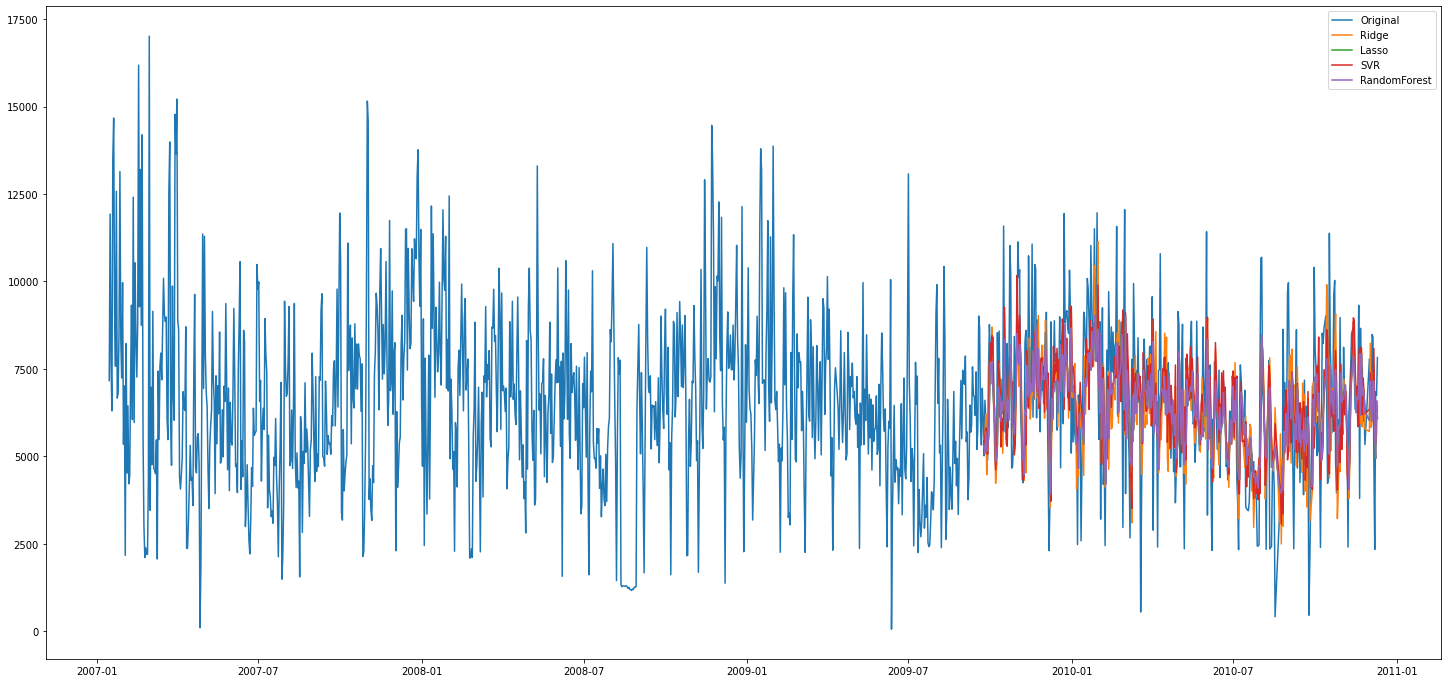

In [139]:
plt.figure(figsize = (25,12))
plt.plot(y_for_plot['Y_original'],label = 'Original')

for i in range(1,5):
    plt.plot(y_for_plot.iloc[test_len:,i],label = y_for_plot.columns[i])

# plt.plot(Target.index,np.vstack((y_train,y_ridge_inverse)),label = 'Ridge')
# plt.plot(Target.index,np.vstack((y_train,y_lasso_inverse)),label = 'Lasso')
# plt.plot(Target.index,np.vstack((y_train,y_svr_inverse)),label = 'SVR')
# plt.plot(Target.index,np.vstack((y_train,y_rfr_inverse)),label = 'RandomForest')
plt.legend()
plt.show()

In [82]:
# fig, ax = plt.subplots(5, 1,figsize = (18,9))
# fig.suptitle("No Feature Selection")
# ax[0].plot(y_test,label = 'Original')
# ax[0].legend()
# ax[1].plot(y_ridge_inverse,label = 'Ridge',color = 'red')
# ax[1].legend()
# ax[2].plot(y_lasso_inverse,label = 'Lasso',color = 'g')
# ax[2].legend()
# ax[3].plot(y_svr_inverse,label = 'SVR',color = 'y')
# ax[3].legend()
# ax[4].plot(y_rfr_inverse,label = 'RandomForest',color = 'purple')
# ax[4].legend()
# plt.legend()
# plt.savefig("No seletion on Electricity.png")
# plt.show()

Ridge r2 score: -1.343244224905452 rmse: 2119.177151517461
Lasso r2 score: -2.1293733585477455 rmse: 1896.1638095748888
SVR r2 score: -1.5158548600420843 rmse: 2036.3900754648455
RandomForest r2 score: -2.1293733585477455 rmse: 1896.1638095748888


## PACF-AIC,BIC,HQIC

In [179]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:%f, p-value:%f'%(result[0],result[1]))
    
def plot_acf_pacf(series,name):
    fig = plt.figure(figsize=(14,8))
    ax1 = fig.add_subplot(211)
    plot_acf(series,lags = 15 ,ax = ax1,title = name+' ACF')
    fig.tight_layout()
    ax2 = fig.add_subplot(212)
    plot_pacf(series,lags = 15,ax = ax2,title = name+' PACF')
    fig.tight_layout()
    plt.show()

def lag_based_IC(data,max_lag):
    ar_orders = range(1,max_lag)
    indices_dict = {}
    for col in list(data.columns):
        
        fitted_model_dict = {}
        for idx,ar_order in enumerate(ar_orders):
        #create AR(p) model
            ar_model = ARMA(data[col],order = (ar_order,0))
            ar_model_fit = ar_model.fit()
            fitted_model_dict[ar_order] = ar_model_fit
        AIC = {}
        BIC = {}
        HQIC = {}
        for ar_order in ar_orders:
            AIC[ar_order] = fitted_model_dict[ar_order].aic
            BIC[ar_order] = fitted_model_dict[ar_order].bic
            HQIC[ar_order] = fitted_model_dict[ar_order].hqic
        min_AIC=min(zip(AIC.values(),AIC.keys()))
        min_BIC=min(zip(BIC.values(),BIC.keys()))
        min_HQIC=min(zip(HQIC.values(),HQIC.keys()))
        print("%s :AIC:%f, Min Lag:%s;BIC:%f, Min Lag:%s;HQIC:%f, Min Lag:%s"%
              (col,min_AIC[0],min_AIC[1],min_BIC[0],min_BIC[1],min_HQIC[0],min_HQIC[1]))
        
        indices_dict[col] = {'AIC': min_AIC[1], 'BIC':min_BIC[1], 'HQIC':min_HQIC[1]}
        
    return indices_dict

### ADF Test on Every Feature

In [161]:
sum_df['Global_intensity_1'] = sum_df['Global_intensity'].shift(1)

In [164]:
X = sum_df.iloc[:,:-2]
Y = sum_df.iloc[:,-1]

In [167]:
X.columns,Y.name

(Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
       dtype='object'),
 'Global_intensity_1')

In [171]:
for col in list(X.columns):
    print("ADF test of %s,diff_1_%s, diff_2_%s "%(col,col,col))
    perform_adf_test(sum_df[col]),perform_adf_test(sum_df[col].diff(1).dropna()),perform_adf_test(sum_df[col].diff(2).dropna())

ADF test of Global_active_power,diff_1_Global_active_power, diff_2_Global_active_power 
ADF Statistic:-9.225569, p-value:0.000000
ADF Statistic:-13.904881, p-value:0.000000
ADF Statistic:-12.637208, p-value:0.000000
ADF test of Global_reactive_power,diff_1_Global_reactive_power, diff_2_Global_reactive_power 
ADF Statistic:-14.591551, p-value:0.000000
ADF Statistic:-12.524767, p-value:0.000000
ADF Statistic:-13.296663, p-value:0.000000
ADF test of Voltage,diff_1_Voltage, diff_2_Voltage 
ADF Statistic:-20.127521, p-value:0.000000
ADF Statistic:-13.259177, p-value:0.000000
ADF Statistic:-12.918579, p-value:0.000000
ADF test of Sub_metering_1,diff_1_Sub_metering_1, diff_2_Sub_metering_1 
ADF Statistic:-20.266848, p-value:0.000000
ADF Statistic:-13.558321, p-value:0.000000
ADF Statistic:-12.292510, p-value:0.000000
ADF test of Sub_metering_2,diff_1_Sub_metering_2, diff_2_Sub_metering_2 
ADF Statistic:-12.297733, p-value:0.000000
ADF Statistic:-13.313994, p-value:0.000000
ADF Statistic:-12.6

Original Time Series is stationary

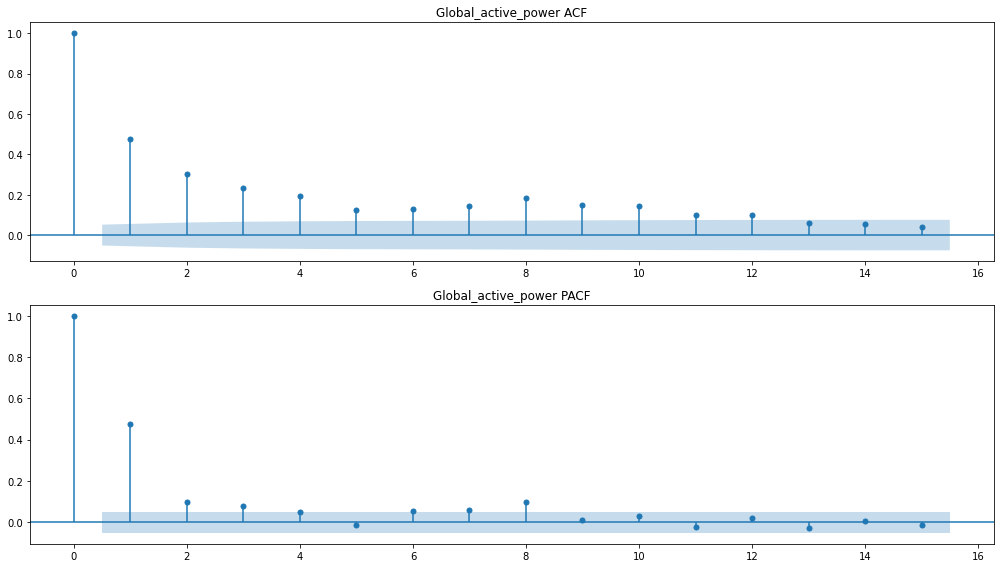

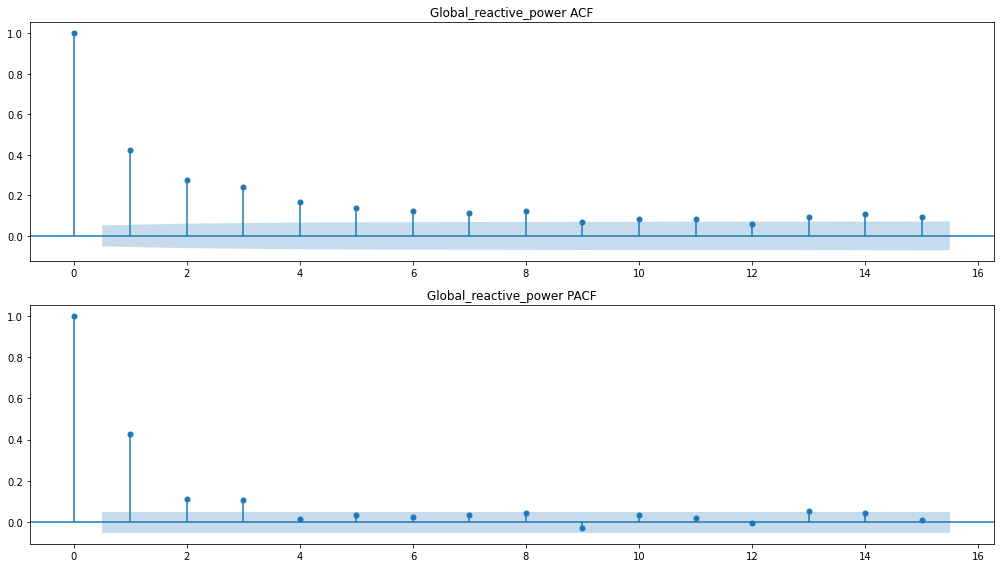

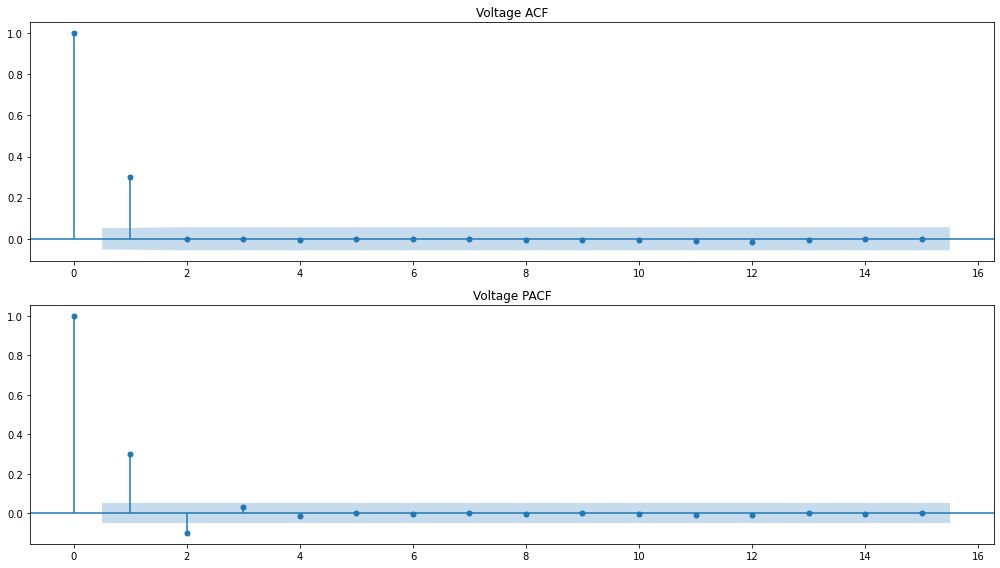

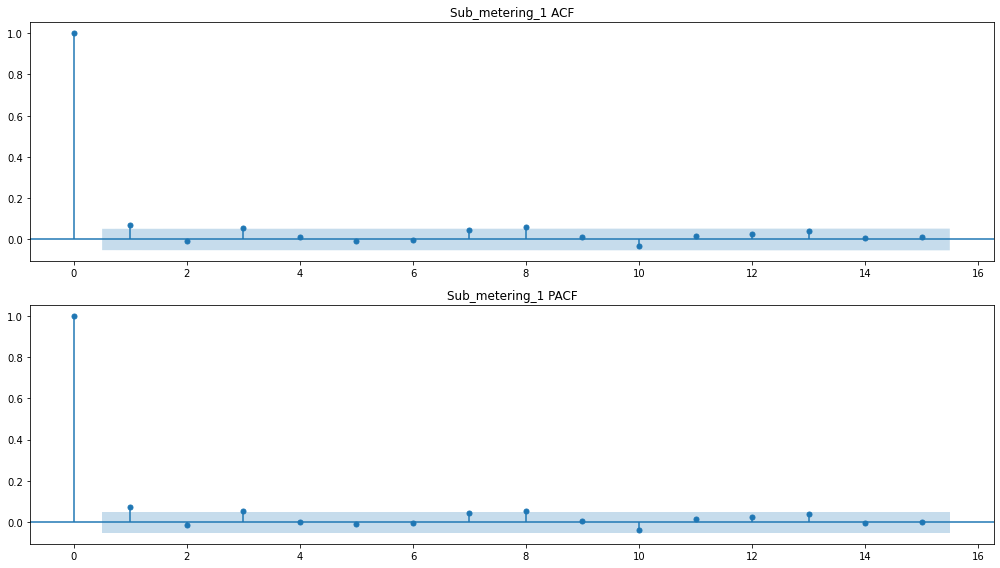

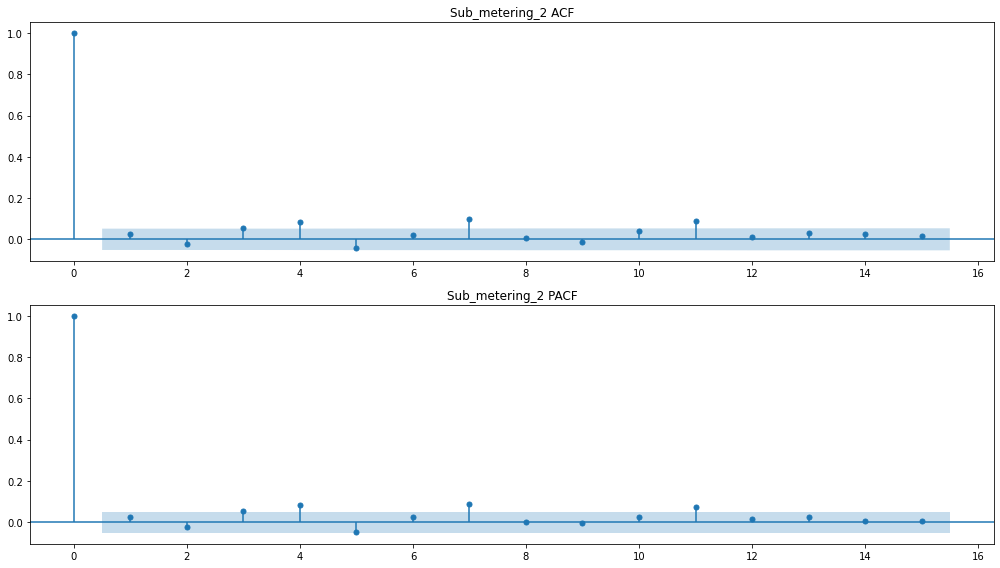

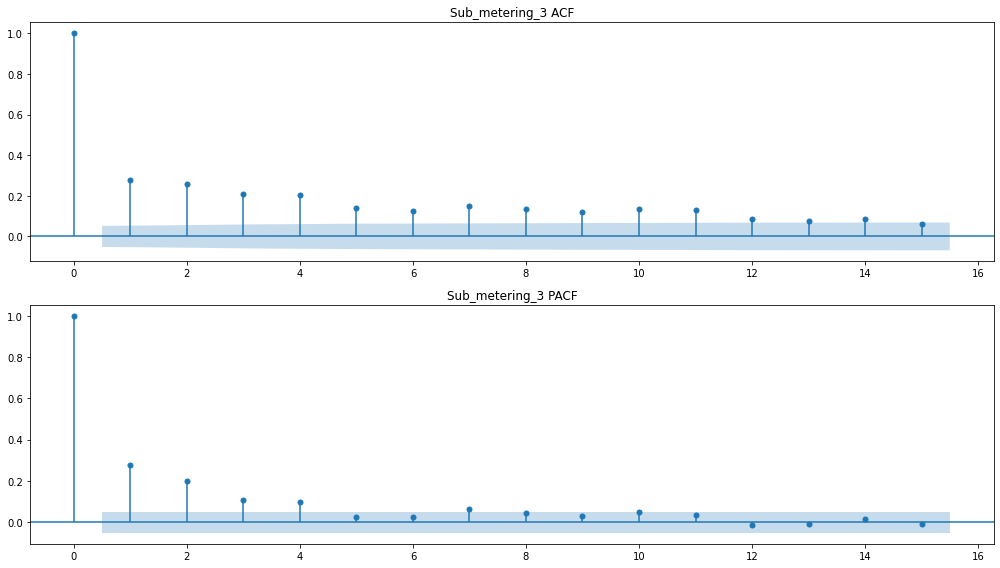

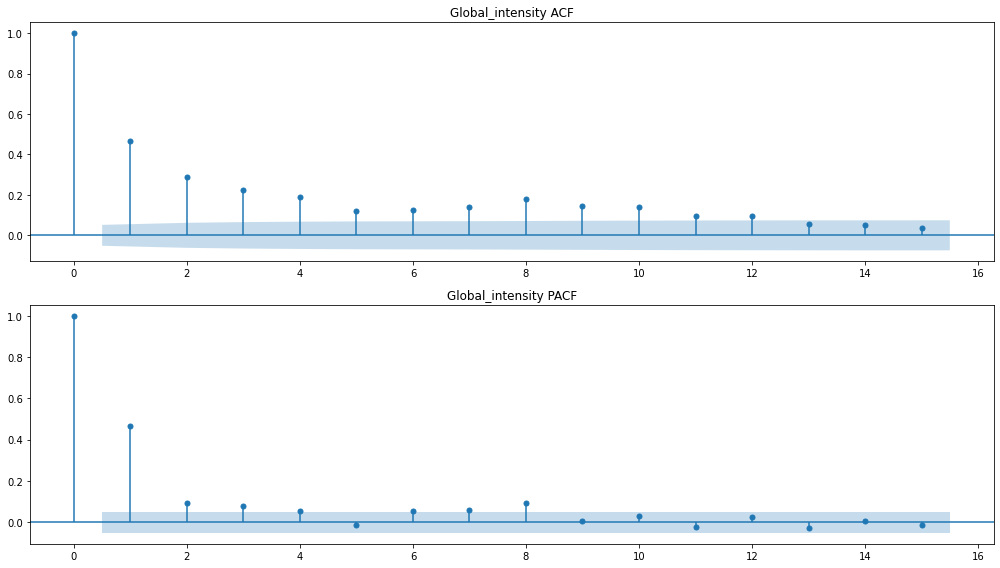

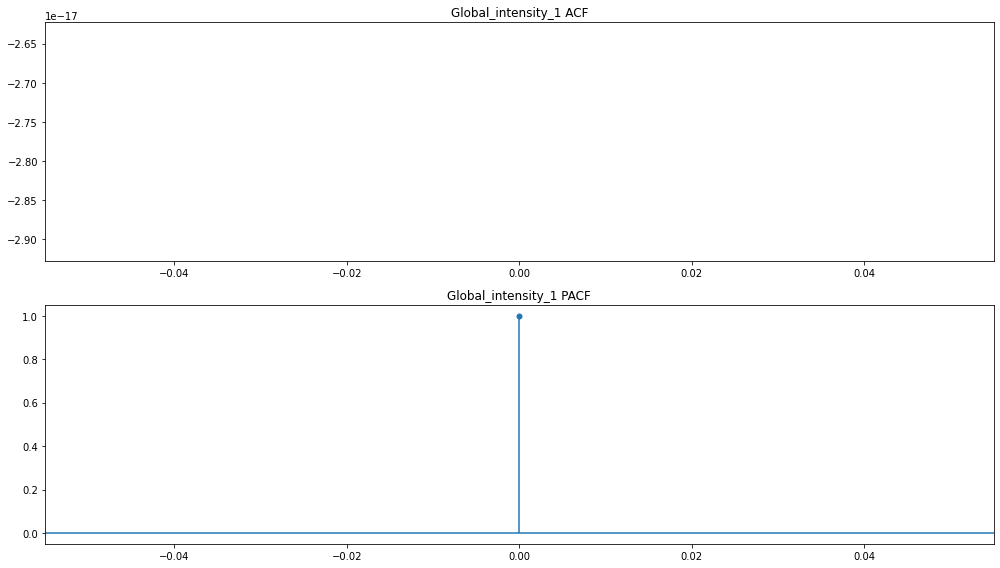

In [172]:
for col in sum_df.columns:
    plot_acf_pacf(sum_df[col],col)

### Target  ACF

(0.0, 150.0)

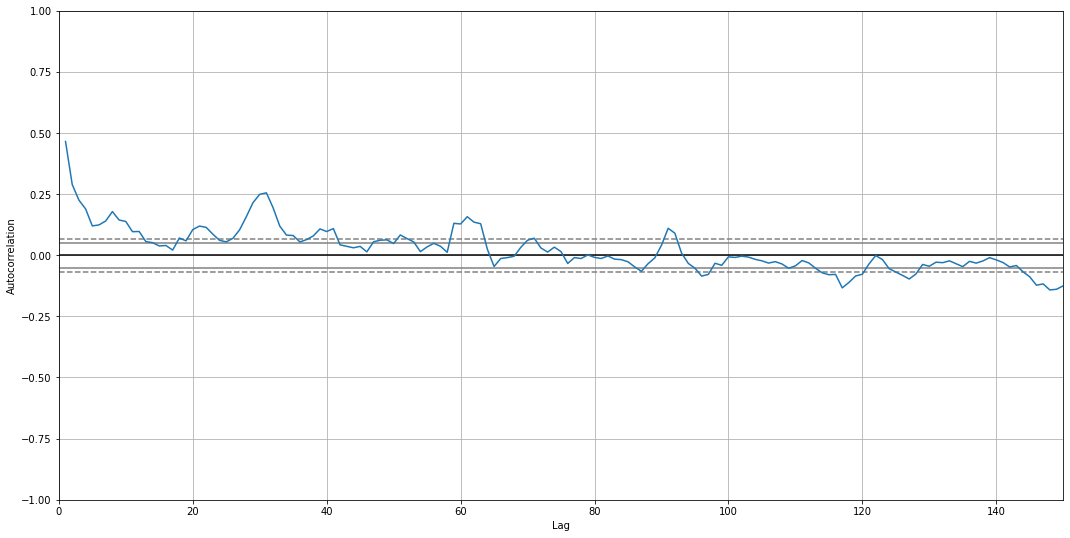

In [159]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize = (18,9))
autocorrelation_plot(sum_df.iloc[:,-1].tolist()).set_xlim([0, 150])

In [173]:
sum_df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity,Global_intensity_1
Date,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,0.0,546.0,4926.0,5180.8,NaN
2006-12-17,3390.460,226.006,345725.32,2033.0,4187.0,13341.0,14398.6,5180.8
2006-12-18,2203.826,161.792,347373.64,1063.0,2621.0,14018.0,9247.2,14398.6
2006-12-19,1666.194,150.942,348479.01,839.0,7602.0,6197.0,7094.0,9247.2
2006-12-20,2225.748,160.998,348923.61,0.0,2648.0,14063.0,9313.0,7094.0
...,...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,1724.0,646.0,6444.0,4892.0,8414.8
2010-12-08,529.698,169.098,346744.70,0.0,514.0,3982.0,2338.2,4892.0
2010-12-09,1612.092,201.358,347932.40,1805.0,2080.0,8891.0,6848.2,2338.2


In [174]:
lag_based_IC(X,15)

Global_active_power :AIC:22033.340025, Min Lag:8;BIC:22076.293483, Min Lag:3;HQIC:22053.008342, Min Lag:8
Global_reactive_power :AIC:14978.676647, Min Lag:3;BIC:15005.014274, Min Lag:3;HQIC:14988.510806, Min Lag:3
Voltage :AIC:32909.552036, Min Lag:3;BIC:32930.922192, Min Lag:2;HQIC:32917.719417, Min Lag:2
Sub_metering_1 :AIC:25186.137793, Min Lag:3;BIC:25202.790772, Min Lag:1;HQIC:25192.888691, Min Lag:1
Sub_metering_2 :AIC:25963.838590, Min Lag:11;BIC:25998.352412, Min Lag:1;HQIC:25982.704777, Min Lag:7
Sub_metering_3 :AIC:27441.220786, Min Lag:10;BIC:27475.925411, Min Lag:4;HQIC:27456.121249, Min Lag:4


In [ ]:
indices_dict = lag_based_IC(X,30)

Two Ways to Explain the PACF lag

1.choose only one lag of one feature

2.choose lags from 0 to the computed lag based on AIC,BIC,HQIC : So this is like a lag subset of one feature 

### AIC

1.Global_active_power:8 Global_reactive_power:3 Voltage:3,Sub_metering_1:3,Sub_metering_2:11,Sub_metering_3_Lag:10

2.Global_active_power:0-8 Global_reactive_power:0-3 Voltage:0-3,Sub_metering_1:0-3,Sub_metering_2:0-11,Sub_metering_3_Lag:0-10

In [ ]:
Glo